In [1]:
import catboost
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import sweetviz

from sklearn.model_selection import train_test_split
from nflows.distributions import ConditionalDiagonalNormal

from src.probabilistic_flow_boosting.tfboost.tree import EmbeddableCatBoostPriorNormal
from src.probabilistic_flow_boosting.tfboost.tfboost import TreeFlowBoost
from src.probabilistic_flow_boosting.tfboost.flow import ContinuousNormalizingFlow
from src.probabilistic_flow_boosting.pipelines.reporting.nodes import calculate_nll

from src.probabilistic_flow_boosting.pipelines.modeling.utils import setup_random_seed

RANDOM_SEED = 5

setup_random_seed(RANDOM_SEED)

In [2]:
df = pd.read_csv('data/01_raw/CatData/diamonds2/diamonds_dataset.csv')

In [3]:
# analysis = sweetviz.analyze(df)
# analysis.show_notebook()

In [4]:
x = df.drop(columns = ['id', 'url', 'price', 'date_fetched'])
y = np.log10(df[['price']])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=42)

In [6]:
x_train.shape, x_test.shape

((95445, 7), (23862, 7))

In [7]:
model = catboost.CatBoostRegressor(
    cat_features=['shape', 'cut', 'color', 'clarity', 'report', 'type'], 
    loss_function="RMSEWithUncertainty",
    num_trees=2000,
    random_seed=RANDOM_SEED
)

In [8]:
%time model.fit(x_tr, y_tr, eval_set=(x_val, y_val))

0:	learn: 0.4714808	test: 0.4704441	best: 0.4704441 (0)	total: 91.5ms	remaining: 3m 2s
1:	learn: 0.4267114	test: 0.4253722	best: 0.4253722 (1)	total: 116ms	remaining: 1m 55s
2:	learn: 0.3911139	test: 0.3895060	best: 0.3895060 (2)	total: 134ms	remaining: 1m 29s
3:	learn: 0.3602476	test: 0.3583980	best: 0.3583980 (3)	total: 153ms	remaining: 1m 16s
4:	learn: 0.3308729	test: 0.3288260	best: 0.3288260 (4)	total: 172ms	remaining: 1m 8s
5:	learn: 0.3033350	test: 0.3012203	best: 0.3012203 (5)	total: 189ms	remaining: 1m 2s
6:	learn: 0.2769826	test: 0.2747165	best: 0.2747165 (6)	total: 207ms	remaining: 58.8s
7:	learn: 0.2529168	test: 0.2505645	best: 0.2505645 (7)	total: 225ms	remaining: 56.1s
8:	learn: 0.2287501	test: 0.2262711	best: 0.2262711 (8)	total: 242ms	remaining: 53.6s
9:	learn: 0.2054363	test: 0.2028476	best: 0.2028476 (9)	total: 259ms	remaining: 51.6s
10:	learn: 0.1829347	test: 0.1802995	best: 0.1802995 (10)	total: 277ms	remaining: 50s
11:	learn: 0.1608753	test: 0.1582110	best: 0.15821

103:	learn: -1.1260159	test: -1.1237370	best: -1.1237370 (103)	total: 1.75s	remaining: 31.9s
104:	learn: -1.1333802	test: -1.1312259	best: -1.1312259 (104)	total: 1.76s	remaining: 31.9s
105:	learn: -1.1415310	test: -1.1393501	best: -1.1393501 (105)	total: 1.78s	remaining: 31.9s
106:	learn: -1.1476565	test: -1.1455572	best: -1.1455572 (106)	total: 1.81s	remaining: 32s
107:	learn: -1.1588357	test: -1.1569381	best: -1.1569381 (107)	total: 1.83s	remaining: 32s
108:	learn: -1.1689447	test: -1.1670389	best: -1.1670389 (108)	total: 1.85s	remaining: 32.2s
109:	learn: -1.1730384	test: -1.1711081	best: -1.1711081 (109)	total: 1.87s	remaining: 32.1s
110:	learn: -1.1758414	test: -1.1738734	best: -1.1738734 (110)	total: 1.87s	remaining: 31.9s
111:	learn: -1.1839152	test: -1.1819414	best: -1.1819414 (111)	total: 1.89s	remaining: 31.8s
112:	learn: -1.1935154	test: -1.1916813	best: -1.1916813 (112)	total: 1.9s	remaining: 31.7s
113:	learn: -1.1989146	test: -1.1970273	best: -1.1970273 (113)	total: 1.92s

203:	learn: -1.4844381	test: -1.4836764	best: -1.4836764 (203)	total: 3.2s	remaining: 28.2s
204:	learn: -1.4853433	test: -1.4845576	best: -1.4845576 (204)	total: 3.22s	remaining: 28.2s
205:	learn: -1.4904344	test: -1.4895476	best: -1.4895476 (205)	total: 3.23s	remaining: 28.1s
206:	learn: -1.4935941	test: -1.4925009	best: -1.4925009 (206)	total: 3.25s	remaining: 28.1s
207:	learn: -1.4949896	test: -1.4938777	best: -1.4938777 (207)	total: 3.26s	remaining: 28.1s
208:	learn: -1.4981190	test: -1.4968340	best: -1.4968340 (208)	total: 3.28s	remaining: 28.1s
209:	learn: -1.4983044	test: -1.4970112	best: -1.4970112 (209)	total: 3.28s	remaining: 28s
210:	learn: -1.4994002	test: -1.4981477	best: -1.4981477 (210)	total: 3.29s	remaining: 27.9s
211:	learn: -1.5037936	test: -1.5023868	best: -1.5023868 (211)	total: 3.31s	remaining: 27.9s
212:	learn: -1.5039683	test: -1.5025537	best: -1.5025537 (212)	total: 3.31s	remaining: 27.8s
213:	learn: -1.5053840	test: -1.5042559	best: -1.5042559 (213)	total: 3.3

292:	learn: -1.5980109	test: -1.5948325	best: -1.5948325 (292)	total: 4.44s	remaining: 25.9s
293:	learn: -1.6000349	test: -1.5967362	best: -1.5967362 (293)	total: 4.46s	remaining: 25.9s
294:	learn: -1.6012784	test: -1.5980259	best: -1.5980259 (294)	total: 4.47s	remaining: 25.9s
295:	learn: -1.6017961	test: -1.5984774	best: -1.5984774 (295)	total: 4.49s	remaining: 25.8s
296:	learn: -1.6020730	test: -1.5987309	best: -1.5987309 (296)	total: 4.51s	remaining: 25.8s
297:	learn: -1.6041174	test: -1.6008845	best: -1.6008845 (297)	total: 4.52s	remaining: 25.8s
298:	learn: -1.6061998	test: -1.6028814	best: -1.6028814 (298)	total: 4.54s	remaining: 25.8s
299:	learn: -1.6088595	test: -1.6054654	best: -1.6054654 (299)	total: 4.55s	remaining: 25.8s
300:	learn: -1.6090636	test: -1.6057038	best: -1.6057038 (300)	total: 4.57s	remaining: 25.8s
301:	learn: -1.6099765	test: -1.6065690	best: -1.6065690 (301)	total: 4.58s	remaining: 25.8s
302:	learn: -1.6125167	test: -1.6089996	best: -1.6089996 (302)	total: 

391:	learn: -1.6847713	test: -1.6769338	best: -1.6769338 (391)	total: 5.87s	remaining: 24.1s
392:	learn: -1.6858568	test: -1.6779763	best: -1.6779763 (392)	total: 5.89s	remaining: 24.1s
393:	learn: -1.6862107	test: -1.6783571	best: -1.6783571 (393)	total: 5.91s	remaining: 24.1s
394:	learn: -1.6871293	test: -1.6792050	best: -1.6792050 (394)	total: 5.92s	remaining: 24.1s
395:	learn: -1.6880271	test: -1.6799753	best: -1.6799753 (395)	total: 5.94s	remaining: 24.1s
396:	learn: -1.6887072	test: -1.6805804	best: -1.6805804 (396)	total: 5.95s	remaining: 24s
397:	learn: -1.6890196	test: -1.6809915	best: -1.6809915 (397)	total: 5.97s	remaining: 24s
398:	learn: -1.6894085	test: -1.6814410	best: -1.6814410 (398)	total: 5.98s	remaining: 24s
399:	learn: -1.6902615	test: -1.6822220	best: -1.6822220 (399)	total: 6s	remaining: 24s
400:	learn: -1.6912643	test: -1.6831452	best: -1.6831452 (400)	total: 6.01s	remaining: 24s
401:	learn: -1.6930004	test: -1.6848036	best: -1.6848036 (401)	total: 6.03s	remaini

480:	learn: -1.7360745	test: -1.7250061	best: -1.7250061 (480)	total: 7.33s	remaining: 23.1s
481:	learn: -1.7362587	test: -1.7251850	best: -1.7251850 (481)	total: 7.34s	remaining: 23.1s
482:	learn: -1.7365371	test: -1.7254055	best: -1.7254055 (482)	total: 7.36s	remaining: 23.1s
483:	learn: -1.7371585	test: -1.7260007	best: -1.7260007 (483)	total: 7.38s	remaining: 23.1s
484:	learn: -1.7374386	test: -1.7262748	best: -1.7262748 (484)	total: 7.39s	remaining: 23.1s
485:	learn: -1.7381043	test: -1.7269268	best: -1.7269268 (485)	total: 7.41s	remaining: 23.1s
486:	learn: -1.7382817	test: -1.7271140	best: -1.7271140 (486)	total: 7.42s	remaining: 23.1s
487:	learn: -1.7385138	test: -1.7272979	best: -1.7272979 (487)	total: 7.43s	remaining: 23s
488:	learn: -1.7388062	test: -1.7275111	best: -1.7275111 (488)	total: 7.45s	remaining: 23s
489:	learn: -1.7390079	test: -1.7276817	best: -1.7276817 (489)	total: 7.47s	remaining: 23s
490:	learn: -1.7394023	test: -1.7280925	best: -1.7280925 (490)	total: 7.49s	

572:	learn: -1.7712001	test: -1.7556226	best: -1.7556226 (572)	total: 8.76s	remaining: 21.8s
573:	learn: -1.7715022	test: -1.7558292	best: -1.7558292 (573)	total: 8.78s	remaining: 21.8s
574:	learn: -1.7716928	test: -1.7560673	best: -1.7560673 (574)	total: 8.79s	remaining: 21.8s
575:	learn: -1.7719276	test: -1.7562128	best: -1.7562128 (575)	total: 8.8s	remaining: 21.8s
576:	learn: -1.7721015	test: -1.7562993	best: -1.7562993 (576)	total: 8.82s	remaining: 21.8s
577:	learn: -1.7722735	test: -1.7564211	best: -1.7564211 (577)	total: 8.83s	remaining: 21.7s
578:	learn: -1.7724685	test: -1.7565755	best: -1.7565755 (578)	total: 8.85s	remaining: 21.7s
579:	learn: -1.7733577	test: -1.7574111	best: -1.7574111 (579)	total: 8.86s	remaining: 21.7s
580:	learn: -1.7737900	test: -1.7578377	best: -1.7578377 (580)	total: 8.88s	remaining: 21.7s
581:	learn: -1.7739594	test: -1.7580072	best: -1.7580072 (581)	total: 8.89s	remaining: 21.7s
582:	learn: -1.7749010	test: -1.7588745	best: -1.7588745 (582)	total: 8

673:	learn: -1.8026114	test: -1.7812158	best: -1.7812158 (673)	total: 10.2s	remaining: 20.1s
674:	learn: -1.8030358	test: -1.7815404	best: -1.7815404 (674)	total: 10.2s	remaining: 20.1s
675:	learn: -1.8030586	test: -1.7815198	best: -1.7815404 (674)	total: 10.2s	remaining: 20s
676:	learn: -1.8033496	test: -1.7817155	best: -1.7817155 (676)	total: 10.2s	remaining: 20s
677:	learn: -1.8035567	test: -1.7818553	best: -1.7818553 (677)	total: 10.3s	remaining: 20s
678:	learn: -1.8037856	test: -1.7821304	best: -1.7821304 (678)	total: 10.3s	remaining: 20s
679:	learn: -1.8039414	test: -1.7822452	best: -1.7822452 (679)	total: 10.3s	remaining: 20s
680:	learn: -1.8041417	test: -1.7823649	best: -1.7823649 (680)	total: 10.3s	remaining: 19.9s
681:	learn: -1.8048098	test: -1.7828818	best: -1.7828818 (681)	total: 10.3s	remaining: 19.9s
682:	learn: -1.8053818	test: -1.7836044	best: -1.7836044 (682)	total: 10.3s	remaining: 19.9s
683:	learn: -1.8056156	test: -1.7837505	best: -1.7837505 (683)	total: 10.3s	rema

767:	learn: -1.8233410	test: -1.7974498	best: -1.7974498 (767)	total: 11.6s	remaining: 18.7s
768:	learn: -1.8235307	test: -1.7975331	best: -1.7975331 (768)	total: 11.7s	remaining: 18.7s
769:	learn: -1.8239229	test: -1.7977965	best: -1.7977965 (769)	total: 11.7s	remaining: 18.7s
770:	learn: -1.8243827	test: -1.7981459	best: -1.7981459 (770)	total: 11.7s	remaining: 18.6s
771:	learn: -1.8246933	test: -1.7983522	best: -1.7983522 (771)	total: 11.7s	remaining: 18.6s
772:	learn: -1.8250393	test: -1.7987291	best: -1.7987291 (772)	total: 11.7s	remaining: 18.6s
773:	learn: -1.8254091	test: -1.7990103	best: -1.7990103 (773)	total: 11.7s	remaining: 18.6s
774:	learn: -1.8256094	test: -1.7990896	best: -1.7990896 (774)	total: 11.8s	remaining: 18.6s
775:	learn: -1.8257261	test: -1.7991912	best: -1.7991912 (775)	total: 11.8s	remaining: 18.6s
776:	learn: -1.8258455	test: -1.7992267	best: -1.7992267 (776)	total: 11.8s	remaining: 18.5s
777:	learn: -1.8265238	test: -1.7998499	best: -1.7998499 (777)	total: 

859:	learn: -1.8575221	test: -1.8246501	best: -1.8246501 (859)	total: 13.1s	remaining: 17.4s
860:	learn: -1.8578230	test: -1.8248588	best: -1.8248588 (860)	total: 13.1s	remaining: 17.3s
861:	learn: -1.8580499	test: -1.8249672	best: -1.8249672 (861)	total: 13.1s	remaining: 17.3s
862:	learn: -1.8582753	test: -1.8251399	best: -1.8251399 (862)	total: 13.1s	remaining: 17.3s
863:	learn: -1.8586860	test: -1.8254907	best: -1.8254907 (863)	total: 13.2s	remaining: 17.3s
864:	learn: -1.8592796	test: -1.8260306	best: -1.8260306 (864)	total: 13.2s	remaining: 17.3s
865:	learn: -1.8594694	test: -1.8261301	best: -1.8261301 (865)	total: 13.2s	remaining: 17.3s
866:	learn: -1.8597160	test: -1.8263815	best: -1.8263815 (866)	total: 13.2s	remaining: 17.3s
867:	learn: -1.8598361	test: -1.8264848	best: -1.8264848 (867)	total: 13.3s	remaining: 17.3s
868:	learn: -1.8599298	test: -1.8265206	best: -1.8265206 (868)	total: 13.3s	remaining: 17.3s
869:	learn: -1.8603930	test: -1.8268503	best: -1.8268503 (869)	total: 

956:	learn: -1.8850979	test: -1.8440202	best: -1.8440202 (956)	total: 14.7s	remaining: 16.1s
957:	learn: -1.8852391	test: -1.8440995	best: -1.8440995 (957)	total: 14.8s	remaining: 16.1s
958:	learn: -1.8857660	test: -1.8445901	best: -1.8445901 (958)	total: 14.8s	remaining: 16s
959:	learn: -1.8858557	test: -1.8446734	best: -1.8446734 (959)	total: 14.8s	remaining: 16s
960:	learn: -1.8860579	test: -1.8447094	best: -1.8447094 (960)	total: 14.8s	remaining: 16s
961:	learn: -1.8864626	test: -1.8450894	best: -1.8450894 (961)	total: 14.8s	remaining: 16s
962:	learn: -1.8868202	test: -1.8454428	best: -1.8454428 (962)	total: 14.8s	remaining: 16s
963:	learn: -1.8869984	test: -1.8455716	best: -1.8455716 (963)	total: 14.9s	remaining: 16s
964:	learn: -1.8872718	test: -1.8457906	best: -1.8457906 (964)	total: 14.9s	remaining: 16s
965:	learn: -1.8874704	test: -1.8458906	best: -1.8458906 (965)	total: 14.9s	remaining: 15.9s
966:	learn: -1.8877724	test: -1.8460656	best: -1.8460656 (966)	total: 14.9s	remainin

1050:	learn: -1.9045544	test: -1.8573866	best: -1.8573938 (1049)	total: 16.2s	remaining: 14.6s
1051:	learn: -1.9046535	test: -1.8574063	best: -1.8574063 (1051)	total: 16.2s	remaining: 14.6s
1052:	learn: -1.9048533	test: -1.8575196	best: -1.8575196 (1052)	total: 16.3s	remaining: 14.6s
1053:	learn: -1.9050922	test: -1.8576622	best: -1.8576622 (1053)	total: 16.3s	remaining: 14.6s
1054:	learn: -1.9052742	test: -1.8577609	best: -1.8577609 (1054)	total: 16.3s	remaining: 14.6s
1055:	learn: -1.9053195	test: -1.8577427	best: -1.8577609 (1054)	total: 16.3s	remaining: 14.6s
1056:	learn: -1.9055765	test: -1.8580077	best: -1.8580077 (1056)	total: 16.3s	remaining: 14.5s
1057:	learn: -1.9057444	test: -1.8581234	best: -1.8581234 (1057)	total: 16.3s	remaining: 14.5s
1058:	learn: -1.9059895	test: -1.8582798	best: -1.8582798 (1058)	total: 16.3s	remaining: 14.5s
1059:	learn: -1.9061053	test: -1.8583235	best: -1.8583235 (1059)	total: 16.4s	remaining: 14.5s
1060:	learn: -1.9062841	test: -1.8585458	best: -1.

1137:	learn: -1.9143997	test: -1.8634493	best: -1.8634493 (1137)	total: 17.5s	remaining: 13.2s
1138:	learn: -1.9144357	test: -1.8634762	best: -1.8634762 (1138)	total: 17.5s	remaining: 13.2s
1139:	learn: -1.9144975	test: -1.8634997	best: -1.8634997 (1139)	total: 17.5s	remaining: 13.2s
1140:	learn: -1.9145620	test: -1.8635422	best: -1.8635422 (1140)	total: 17.5s	remaining: 13.2s
1141:	learn: -1.9145951	test: -1.8635383	best: -1.8635422 (1140)	total: 17.5s	remaining: 13.1s
1142:	learn: -1.9146244	test: -1.8635390	best: -1.8635422 (1140)	total: 17.5s	remaining: 13.1s
1143:	learn: -1.9146745	test: -1.8635987	best: -1.8635987 (1143)	total: 17.5s	remaining: 13.1s
1144:	learn: -1.9147996	test: -1.8636440	best: -1.8636440 (1144)	total: 17.5s	remaining: 13.1s
1145:	learn: -1.9148871	test: -1.8636809	best: -1.8636809 (1145)	total: 17.6s	remaining: 13.1s
1146:	learn: -1.9150183	test: -1.8637768	best: -1.8637768 (1146)	total: 17.6s	remaining: 13.1s
1147:	learn: -1.9150893	test: -1.8637615	best: -1.

1236:	learn: -1.9238654	test: -1.8678636	best: -1.8678636 (1236)	total: 18.9s	remaining: 11.7s
1237:	learn: -1.9240825	test: -1.8680120	best: -1.8680120 (1237)	total: 18.9s	remaining: 11.6s
1238:	learn: -1.9243856	test: -1.8682591	best: -1.8682591 (1238)	total: 18.9s	remaining: 11.6s
1239:	learn: -1.9245717	test: -1.8683862	best: -1.8683862 (1239)	total: 18.9s	remaining: 11.6s
1240:	learn: -1.9246603	test: -1.8684395	best: -1.8684395 (1240)	total: 19s	remaining: 11.6s
1241:	learn: -1.9246800	test: -1.8684027	best: -1.8684395 (1240)	total: 19s	remaining: 11.6s
1242:	learn: -1.9247790	test: -1.8684209	best: -1.8684395 (1240)	total: 19s	remaining: 11.6s
1243:	learn: -1.9248477	test: -1.8684506	best: -1.8684506 (1243)	total: 19s	remaining: 11.6s
1244:	learn: -1.9248761	test: -1.8684464	best: -1.8684506 (1243)	total: 19s	remaining: 11.5s
1245:	learn: -1.9249828	test: -1.8685050	best: -1.8685050 (1245)	total: 19s	remaining: 11.5s
1246:	learn: -1.9250072	test: -1.8685029	best: -1.8685050 (124

1325:	learn: -1.9300191	test: -1.8704013	best: -1.8704022 (1323)	total: 20.1s	remaining: 10.2s
1326:	learn: -1.9301988	test: -1.8704907	best: -1.8704907 (1326)	total: 20.2s	remaining: 10.2s
1327:	learn: -1.9302356	test: -1.8704832	best: -1.8704907 (1326)	total: 20.2s	remaining: 10.2s
1328:	learn: -1.9303174	test: -1.8704941	best: -1.8704941 (1328)	total: 20.2s	remaining: 10.2s
1329:	learn: -1.9303580	test: -1.8704655	best: -1.8704941 (1328)	total: 20.2s	remaining: 10.2s
1330:	learn: -1.9304779	test: -1.8704657	best: -1.8704941 (1328)	total: 20.2s	remaining: 10.2s
1331:	learn: -1.9305041	test: -1.8704633	best: -1.8704941 (1328)	total: 20.2s	remaining: 10.1s
1332:	learn: -1.9306151	test: -1.8704199	best: -1.8704941 (1328)	total: 20.3s	remaining: 10.1s
1333:	learn: -1.9306328	test: -1.8704256	best: -1.8704941 (1328)	total: 20.3s	remaining: 10.1s
1334:	learn: -1.9306771	test: -1.8704383	best: -1.8704941 (1328)	total: 20.3s	remaining: 10.1s
1335:	learn: -1.9306977	test: -1.8704278	best: -1.

1412:	learn: -1.9369358	test: -1.8743202	best: -1.8743202 (1412)	total: 21.4s	remaining: 8.88s
1413:	learn: -1.9369776	test: -1.8743478	best: -1.8743478 (1413)	total: 21.4s	remaining: 8.87s
1414:	learn: -1.9370139	test: -1.8743553	best: -1.8743553 (1414)	total: 21.4s	remaining: 8.85s
1415:	learn: -1.9371716	test: -1.8744597	best: -1.8744597 (1415)	total: 21.4s	remaining: 8.83s
1416:	learn: -1.9371970	test: -1.8744703	best: -1.8744703 (1416)	total: 21.4s	remaining: 8.82s
1417:	learn: -1.9372584	test: -1.8745151	best: -1.8745151 (1417)	total: 21.4s	remaining: 8.8s
1418:	learn: -1.9373549	test: -1.8746113	best: -1.8746113 (1418)	total: 21.5s	remaining: 8.79s
1419:	learn: -1.9373936	test: -1.8746088	best: -1.8746113 (1418)	total: 21.5s	remaining: 8.77s
1420:	learn: -1.9374333	test: -1.8746255	best: -1.8746255 (1420)	total: 21.5s	remaining: 8.75s
1421:	learn: -1.9374793	test: -1.8745918	best: -1.8746255 (1420)	total: 21.5s	remaining: 8.74s
1422:	learn: -1.9375328	test: -1.8745778	best: -1.8

1510:	learn: -1.9445861	test: -1.8775463	best: -1.8775463 (1510)	total: 22.8s	remaining: 7.39s
1511:	learn: -1.9447414	test: -1.8776414	best: -1.8776414 (1511)	total: 22.8s	remaining: 7.37s
1512:	learn: -1.9450906	test: -1.8780196	best: -1.8780196 (1512)	total: 22.9s	remaining: 7.36s
1513:	learn: -1.9452017	test: -1.8780872	best: -1.8780872 (1513)	total: 22.9s	remaining: 7.34s
1514:	learn: -1.9452212	test: -1.8780848	best: -1.8780872 (1513)	total: 22.9s	remaining: 7.33s
1515:	learn: -1.9452747	test: -1.8780571	best: -1.8780872 (1513)	total: 22.9s	remaining: 7.32s
1516:	learn: -1.9453727	test: -1.8779912	best: -1.8780872 (1513)	total: 22.9s	remaining: 7.3s
1517:	learn: -1.9454195	test: -1.8780040	best: -1.8780872 (1513)	total: 22.9s	remaining: 7.29s
1518:	learn: -1.9454571	test: -1.8779672	best: -1.8780872 (1513)	total: 23s	remaining: 7.27s
1519:	learn: -1.9454697	test: -1.8779297	best: -1.8780872 (1513)	total: 23s	remaining: 7.26s
1520:	learn: -1.9455715	test: -1.8779461	best: -1.87808

1606:	learn: -1.9523108	test: -1.8811315	best: -1.8811315 (1606)	total: 24.3s	remaining: 5.93s
1607:	learn: -1.9523189	test: -1.8811210	best: -1.8811315 (1606)	total: 24.3s	remaining: 5.92s
1608:	learn: -1.9523499	test: -1.8811288	best: -1.8811315 (1606)	total: 24.3s	remaining: 5.91s
1609:	learn: -1.9524004	test: -1.8811441	best: -1.8811441 (1609)	total: 24.3s	remaining: 5.89s
1610:	learn: -1.9524294	test: -1.8811575	best: -1.8811575 (1610)	total: 24.3s	remaining: 5.87s
1611:	learn: -1.9524885	test: -1.8811224	best: -1.8811575 (1610)	total: 24.3s	remaining: 5.86s
1612:	learn: -1.9524952	test: -1.8811180	best: -1.8811575 (1610)	total: 24.4s	remaining: 5.84s
1613:	learn: -1.9525149	test: -1.8811825	best: -1.8811825 (1613)	total: 24.4s	remaining: 5.83s
1614:	learn: -1.9525833	test: -1.8811936	best: -1.8811936 (1614)	total: 24.4s	remaining: 5.81s
1615:	learn: -1.9526095	test: -1.8812659	best: -1.8812659 (1615)	total: 24.4s	remaining: 5.79s
1616:	learn: -1.9526516	test: -1.8813189	best: -1.

1696:	learn: -1.9573195	test: -1.8815985	best: -1.8816250 (1695)	total: 25.5s	remaining: 4.55s
1697:	learn: -1.9575676	test: -1.8818305	best: -1.8818305 (1697)	total: 25.5s	remaining: 4.54s
1698:	learn: -1.9577668	test: -1.8819721	best: -1.8819721 (1698)	total: 25.5s	remaining: 4.52s
1699:	learn: -1.9578635	test: -1.8819976	best: -1.8819976 (1699)	total: 25.5s	remaining: 4.51s
1700:	learn: -1.9580495	test: -1.8820725	best: -1.8820725 (1700)	total: 25.6s	remaining: 4.49s
1701:	learn: -1.9581795	test: -1.8821725	best: -1.8821725 (1701)	total: 25.6s	remaining: 4.48s
1702:	learn: -1.9583150	test: -1.8823291	best: -1.8823291 (1702)	total: 25.6s	remaining: 4.46s
1703:	learn: -1.9585181	test: -1.8824665	best: -1.8824665 (1703)	total: 25.6s	remaining: 4.45s
1704:	learn: -1.9587166	test: -1.8826029	best: -1.8826029 (1704)	total: 25.6s	remaining: 4.43s
1705:	learn: -1.9589707	test: -1.8828409	best: -1.8828409 (1705)	total: 25.6s	remaining: 4.42s
1706:	learn: -1.9591808	test: -1.8830344	best: -1.

1792:	learn: -1.9737906	test: -1.8938411	best: -1.8938721 (1790)	total: 26.9s	remaining: 3.11s
1793:	learn: -1.9737894	test: -1.8937988	best: -1.8938721 (1790)	total: 27s	remaining: 3.1s
1794:	learn: -1.9738390	test: -1.8937958	best: -1.8938721 (1790)	total: 27s	remaining: 3.08s
1795:	learn: -1.9740687	test: -1.8940488	best: -1.8940488 (1795)	total: 27s	remaining: 3.07s
1796:	learn: -1.9740990	test: -1.8940520	best: -1.8940520 (1796)	total: 27s	remaining: 3.05s
1797:	learn: -1.9741285	test: -1.8940713	best: -1.8940713 (1797)	total: 27s	remaining: 3.04s
1798:	learn: -1.9741592	test: -1.8939723	best: -1.8940713 (1797)	total: 27.1s	remaining: 3.02s
1799:	learn: -1.9741857	test: -1.8939591	best: -1.8940713 (1797)	total: 27.1s	remaining: 3.01s
1800:	learn: -1.9742758	test: -1.8939567	best: -1.8940713 (1797)	total: 27.1s	remaining: 2.99s
1801:	learn: -1.9743504	test: -1.8940320	best: -1.8940713 (1797)	total: 27.1s	remaining: 2.98s
1802:	learn: -1.9743845	test: -1.8940090	best: -1.8940713 (17

1889:	learn: -1.9791466	test: -1.8963369	best: -1.8963423 (1888)	total: 28.4s	remaining: 1.65s
1890:	learn: -1.9791689	test: -1.8963255	best: -1.8963423 (1888)	total: 28.4s	remaining: 1.64s
1891:	learn: -1.9791773	test: -1.8963153	best: -1.8963423 (1888)	total: 28.4s	remaining: 1.62s
1892:	learn: -1.9791897	test: -1.8963136	best: -1.8963423 (1888)	total: 28.4s	remaining: 1.6s
1893:	learn: -1.9792196	test: -1.8963177	best: -1.8963423 (1888)	total: 28.4s	remaining: 1.59s
1894:	learn: -1.9792393	test: -1.8962862	best: -1.8963423 (1888)	total: 28.4s	remaining: 1.57s
1895:	learn: -1.9792588	test: -1.8962784	best: -1.8963423 (1888)	total: 28.4s	remaining: 1.56s
1896:	learn: -1.9792871	test: -1.8962733	best: -1.8963423 (1888)	total: 28.4s	remaining: 1.54s
1897:	learn: -1.9793098	test: -1.8962691	best: -1.8963423 (1888)	total: 28.5s	remaining: 1.53s
1898:	learn: -1.9793600	test: -1.8962339	best: -1.8963423 (1888)	total: 28.5s	remaining: 1.51s
1899:	learn: -1.9793742	test: -1.8962399	best: -1.8

1985:	learn: -1.9837364	test: -1.8962512	best: -1.8975404 (1947)	total: 29.8s	remaining: 210ms
1986:	learn: -1.9837574	test: -1.8962369	best: -1.8975404 (1947)	total: 29.8s	remaining: 195ms
1987:	learn: -1.9838305	test: -1.8962747	best: -1.8975404 (1947)	total: 29.9s	remaining: 180ms
1988:	learn: -1.9838625	test: -1.8962361	best: -1.8975404 (1947)	total: 29.9s	remaining: 165ms
1989:	learn: -1.9839173	test: -1.8962815	best: -1.8975404 (1947)	total: 29.9s	remaining: 150ms
1990:	learn: -1.9839554	test: -1.8962586	best: -1.8975404 (1947)	total: 29.9s	remaining: 135ms
1991:	learn: -1.9840066	test: -1.8962028	best: -1.8975404 (1947)	total: 29.9s	remaining: 120ms
1992:	learn: -1.9840312	test: -1.8962111	best: -1.8975404 (1947)	total: 30s	remaining: 105ms
1993:	learn: -1.9840712	test: -1.8961824	best: -1.8975404 (1947)	total: 30s	remaining: 90.2ms
1994:	learn: -1.9840947	test: -1.8961710	best: -1.8975404 (1947)	total: 30s	remaining: 75.2ms
1995:	learn: -1.9841250	test: -1.8961296	best: -1.8975

In [9]:
def calculate_nll_catboost(model: catboost.CatBoostRegressor, x: pd.DataFrame, y: pd.DataFrame):
    x: np.ndarray = x.values
    y: np.ndarray = y.values

    if y.shape[1] > 1:
        return np.nan

    y_hat_tree = model.predict(x)
    y_hat_tree[:, 1] = np.log(np.sqrt(y_hat_tree[:, 1]))  # Transform var to log std / CatBoost RMSEWithUncertainty

    distribution = ConditionalDiagonalNormal(shape=[1])  # Assume 1D distribution
    return -distribution.log_prob(y, y_hat_tree).numpy().mean()

In [10]:
%time calculate_nll_catboost(model, x_train, y_train)

CPU times: user 997 ms, sys: 124 ms, total: 1.12 s
Wall time: 150 ms


-1.9600521660422041

In [11]:
%time calculate_nll_catboost(model, x_test, y_test)

CPU times: user 1.06 s, sys: 53.9 ms, total: 1.12 s
Wall time: 56.7 ms


-1.8889447577925167

In [12]:
tree = EmbeddableCatBoostPriorNormal(
    cat_features=[0, 2, 3, 4, 5, 6], 
    loss_function="RMSEWithUncertainty",
    depth=4,
    num_trees=200,
    random_state=RANDOM_SEED
)
flow = ContinuousNormalizingFlow(input_dim=1, hidden_dims=(100, 100, 50), context_dim=100, num_blocks=5, conditional=True)

treeflow = TreeFlowBoost(tree, flow, embedding_size=100)

In [13]:
%time treeflow.fit(x_tr.values, y_tr.values, x_val.values, y_val.values, n_epochs=30, batch_size=2048, verbose=True)

0:	learn: 0.4816682	total: 14ms	remaining: 2.79s
1:	learn: 0.4408901	total: 26.7ms	remaining: 2.65s
2:	learn: 0.4062981	total: 37.5ms	remaining: 2.46s
3:	learn: 0.3769064	total: 49ms	remaining: 2.4s
4:	learn: 0.3498464	total: 60ms	remaining: 2.34s
5:	learn: 0.3238136	total: 70ms	remaining: 2.26s
6:	learn: 0.2989821	total: 82.3ms	remaining: 2.27s
7:	learn: 0.2811062	total: 92.1ms	remaining: 2.21s
8:	learn: 0.2576916	total: 103ms	remaining: 2.19s
9:	learn: 0.2350639	total: 113ms	remaining: 2.15s
10:	learn: 0.2131162	total: 125ms	remaining: 2.14s
11:	learn: 0.1921783	total: 135ms	remaining: 2.11s
12:	learn: 0.1730746	total: 146ms	remaining: 2.1s
13:	learn: 0.1527124	total: 157ms	remaining: 2.09s
14:	learn: 0.1323338	total: 167ms	remaining: 2.06s
15:	learn: 0.1148219	total: 176ms	remaining: 2.03s
16:	learn: 0.0954870	total: 186ms	remaining: 2s
17:	learn: 0.0758986	total: 197ms	remaining: 1.99s
18:	learn: 0.0571760	total: 209ms	remaining: 1.99s
19:	learn: 0.0382924	total: 220ms	remaining: 1

158:	learn: -1.2058587	total: 1.66s	remaining: 428ms
159:	learn: -1.2093879	total: 1.67s	remaining: 416ms
160:	learn: -1.2131294	total: 1.68s	remaining: 406ms
161:	learn: -1.2157153	total: 1.68s	remaining: 395ms
162:	learn: -1.2188750	total: 1.69s	remaining: 384ms
163:	learn: -1.2221952	total: 1.7s	remaining: 374ms
164:	learn: -1.2250612	total: 1.72s	remaining: 364ms
165:	learn: -1.2272412	total: 1.72s	remaining: 353ms
166:	learn: -1.2293177	total: 1.74s	remaining: 343ms
167:	learn: -1.2323090	total: 1.75s	remaining: 333ms
168:	learn: -1.2333118	total: 1.75s	remaining: 322ms
169:	learn: -1.2350276	total: 1.76s	remaining: 311ms
170:	learn: -1.2380947	total: 1.77s	remaining: 301ms
171:	learn: -1.2431648	total: 1.78s	remaining: 291ms
172:	learn: -1.2474195	total: 1.79s	remaining: 280ms
173:	learn: -1.2496209	total: 1.8s	remaining: 270ms
174:	learn: -1.2524803	total: 1.81s	remaining: 259ms
175:	learn: -1.2541658	total: 1.83s	remaining: 249ms
176:	learn: -1.2560902	total: 1.83s	remaining: 2

TreeFlowBoost(embedding_size=100,
              flow_model=<src.probabilistic_flow_boosting.tfboost.flow.flow.ContinuousNormalizingFlow object at 0x7f48e4aa87f0>,
              tree_model=<src.probabilistic_flow_boosting.tfboost.tree.ecatboost.EmbeddableCatBoostPriorNormal object at 0x7f48e4aa8828>)

In [14]:
%time calculate_nll(treeflow, x_train, y_train, batch_size = 1024)

CPU times: user 1min 4s, sys: 2.7 s, total: 1min 6s
Wall time: 55.2 s


-2.1084387

In [15]:
%time calculate_nll(treeflow, x_test, y_test, batch_size = 1024)

CPU times: user 21.8 s, sys: 899 ms, total: 22.7 s
Wall time: 14.3 s


-2.1239305

In [16]:
data = x_test.iloc[:10, :]

In [17]:
y_test_catboost = model.predict(data)

y_test_samples = treeflow.sample(data, num_samples=1000)
y_test_samples = y_test_samples.squeeze()

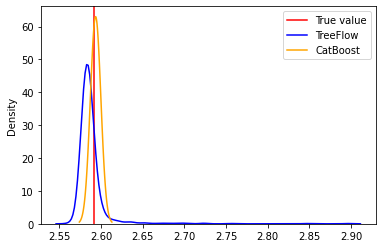

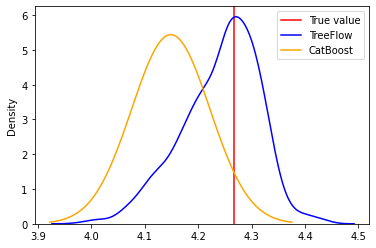

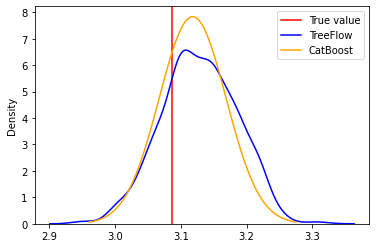

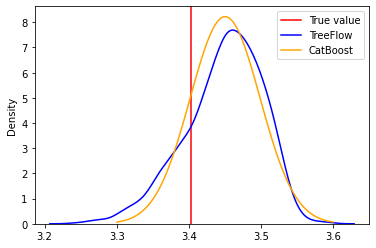

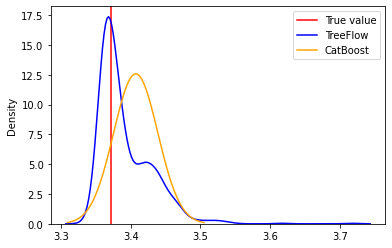

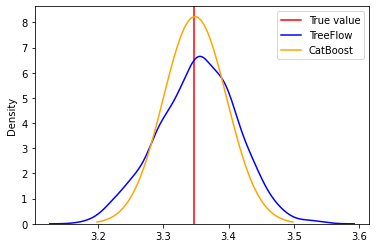

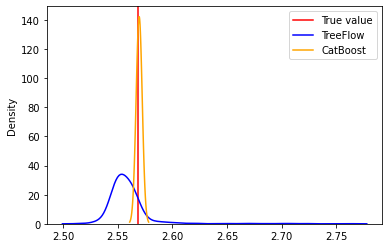

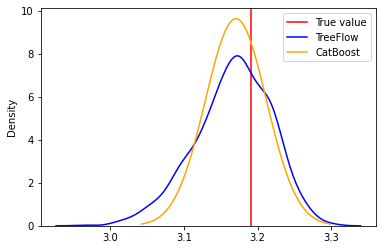

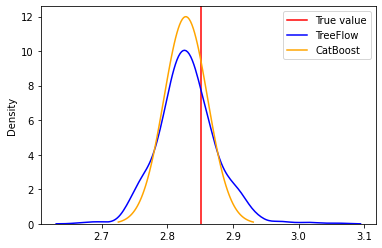

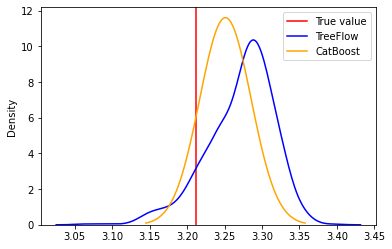

In [18]:
for i in range(10):
    plt.axvline(x=y_test.values[i, :], color='r', label='True value')

    sns.kdeplot(y_test_samples[i, :], color='blue', label='TreeFlow')

    x = np.linspace(
        stats.norm.ppf(0.001, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), 
        stats.norm.ppf(0.999, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), 
        100
    )
    plt.plot(x, stats.norm.pdf(x, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), color = 'orange', label='CatBoost')

    plt.legend()
    plt.show()